In [6]:
import numpy as np
import matplotlib.pyplot as plt

def normal_pdf(x, mu, sigma_sq):
    return (1 / np.sqrt(2 * np.pi * sigma_sq)) * np.exp(-(x - mu)**2 / (2 * sigma_sq))


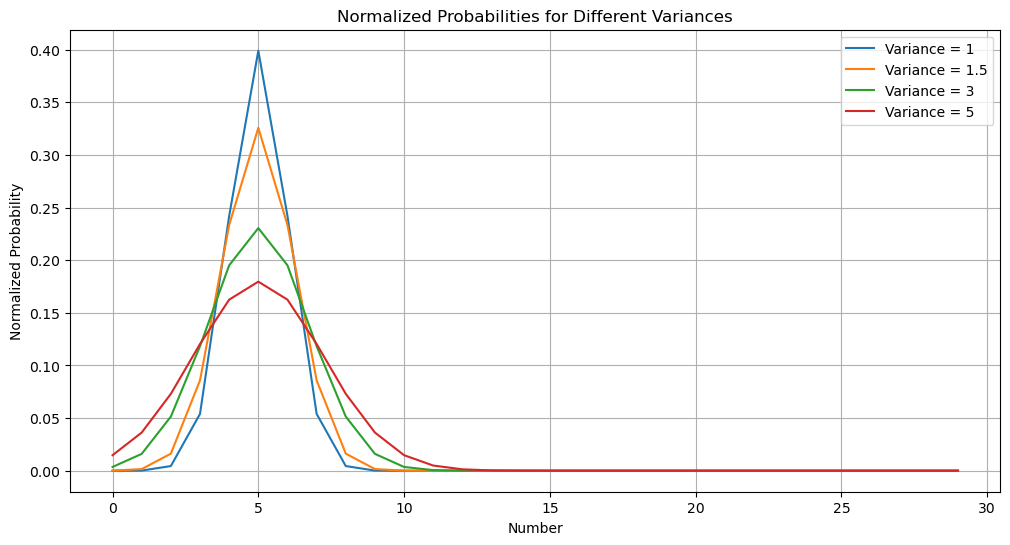

In [7]:
# 다양한 분산 값에 대한 확률 분포를 계산
variances = [1, 1.5, 3, 5]
normalized_probabilities_var = {}

numbers_30 = np.arange(30)
mu_30 = 5

for var in variances:
    pdf_values_var = normal_pdf(numbers_30, mu_30, var)
    total_pdf_var = np.sum(pdf_values_var)
    normalized_probabilities_var[var] = pdf_values_var / total_pdf_var

# 그래프로 결과를 표시
plt.figure(figsize=(12, 6))

for var in variances:
    plt.plot(numbers_30, normalized_probabilities_var[var], label=f'Variance = {var}')

plt.title('Normalized Probabilities for Different Variances')
plt.xlabel('Number')
plt.ylabel('Normalized Probability')
plt.legend()
plt.grid(True)
plt.show()

In [8]:

# Define the range and mode
x_range = np.arange(0, 31)

mode = 10  # Mode of the distribution #TODO '
skewness = 20  # Adjust this parameter to control the skewness
scale = 1
#### cal mean ! ####
mean = mode - 1

range_min = 0
range_max = 30
data = skewnorm.rvs(a=skewness, loc=mean, scale=2, size=1000)   #loc가 평균을 의미  ...
data = np.clip(data, range_min, range_max)
# Round the continuous data to convert it to discrete values
discrete_data = np.round(data).astype(int)

# Clip data to fit within the desired range (0, 30)
discrete_data = np.clip(discrete_data, range_min, range_max)

# Plot the histogram for the discrete distribution
plt.hist(discrete_data, bins=range(range_min, range_max + 1), density=True, alpha=0.6, color='b', align='left')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Discrete Skewed Distribution with Mode=5 and Range=(0, 30)')
plt.show()

# def calculate_weights(x, N):
#     return (x/N)**2 * np.exp(-0.1 * (x - N)**2)

# # Calculate weights
# weights = calculate_weights(x_range, N)

# # Normalize the weights to make them probabilities
# weights = weights / np.sum(weights)

NameError: name 'skewnorm' is not defined

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 가우시안 함수
def gaussian(x, mu, sigma):
    return (1.0 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-((x - mu)**2) / (2 * sigma**2))

def main():
    # 평균과 표준편차 설정
    mean_value = int(input())  # 예시 값
    std_dev = 1.2     # 예시 값

    # x 값 범위 설정
    x = np.linspace(0, 30, 500)

    # 가우시안 함수 계산
    y = gaussian(x, mean_value, std_dev)

    # 그래프 그리기
    plt.plot(x, y)
    plt.title("Gaussian Distribution")
    plt.xlabel("x")
    plt.ylabel("Probability Density")
    plt.grid(True)
    plt.show()
    
main()

ValueError: invalid literal for int() with base 10: ''

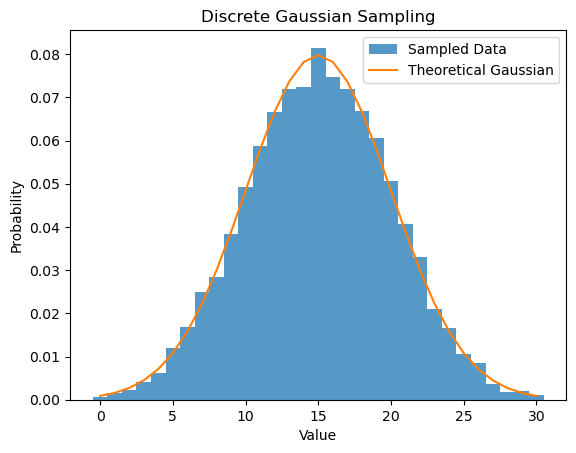

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, mu, sigma):
    return (1.0 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-((x - mu)**2) / (2 * sigma**2))

def sample_discrete_gaussian(mean_value, std_dev=0.1, lower_bound=0, upper_bound=30):
    x = np.arange(lower_bound, upper_bound+1)
    y = gaussian(x, mean_value, std_dev)
    sampled_value = np.random.choice(x, p=y/np.sum(y))
    return sampled_value

def visuatlize_gaussian(mean, std):
    num_samples = 10000
    samples = [sample_discrete_gaussian(mean, std) for _ in range(num_samples)]

    plt.hist(samples, bins=np.arange(0, 32) - 0.5, density=True, alpha=0.75, label='Sampled Data')

    x = np.arange(0, 31)
    y = gaussian(x, mean, std)
    plt.plot(x, y, label='Theoretical Gaussian')

    plt.xlabel('Value')
    plt.ylabel('Probability')
    plt.title('Discrete Gaussian Sampling')
    plt.legend()
    plt.show()

def example_gaussian():
    std = 5
    visuatlize_gaussian(15, std)

example_gaussian()

In [11]:
import numpy as np
import random

# 이산 가우시안 확률을 계산하는 함수
def discrete_gaussian_prob(mean_value, std_dev=1, lower_bound=0, upper_bound=30):
    x = np.arange(lower_bound, upper_bound + 1)
    y = (1.0 / np.sqrt(2 * np.pi * std_dev ** 2)) * np.exp(-((x - mean_value) ** 2) / (2 * std_dev ** 2))
    return y / np.sum(y)

# Q-table의 예 (랜덤하게 초기화)
Q_table = np.random.rand(31)
min_val = np.min(Q_table)
max_val = np.max(Q_table)
normalized_Q_table = (Q_table - min_val) / (max_val - min_val)

# 평균 값 (예를 들어, 15)
mean_value = 15
std = 3
# 가우시안 분포의 확률 계산
gaussian_prob = discrete_gaussian_prob(mean_value, 3)

# Q-value와 가우시안 확률을 결합 (예를 들어, 각각에 대해 0.5의 가중치를 적용)
weight = 0.9
combined_prob = (1-weight) * normalized_Q_table / np.max(normalized_Q_table) + weight * gaussian_prob

g = np.argmax(gaussian_prob)
q = np.argmax(Q_table)
print("gaussian", g, "Qtable", q)
c = np.argmax(combined_prob)
print("combine", c)

for _ in range(15) :
    optimal_value = np.random.choice(np.arange(0, 31), p=combined_prob / np.sum(combined_prob))
    print("Sampled optimal value:", optimal_value)



gaussian 15 Qtable 15
combine 15
Sampled optimal value: 20
Sampled optimal value: 14
Sampled optimal value: 23
Sampled optimal value: 16
Sampled optimal value: 20
Sampled optimal value: 15
Sampled optimal value: 17
Sampled optimal value: 15
Sampled optimal value: 1
Sampled optimal value: 21
Sampled optimal value: 12
Sampled optimal value: 30
Sampled optimal value: 19
Sampled optimal value: 19
Sampled optimal value: 14


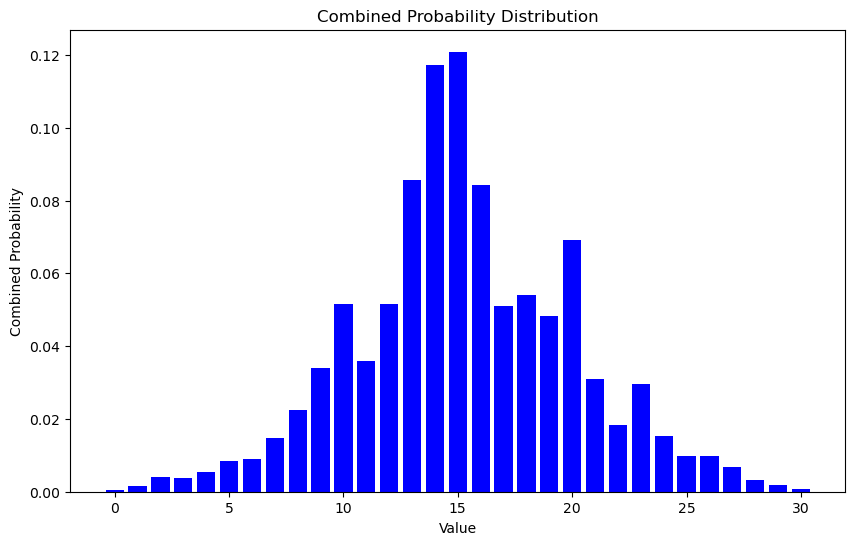

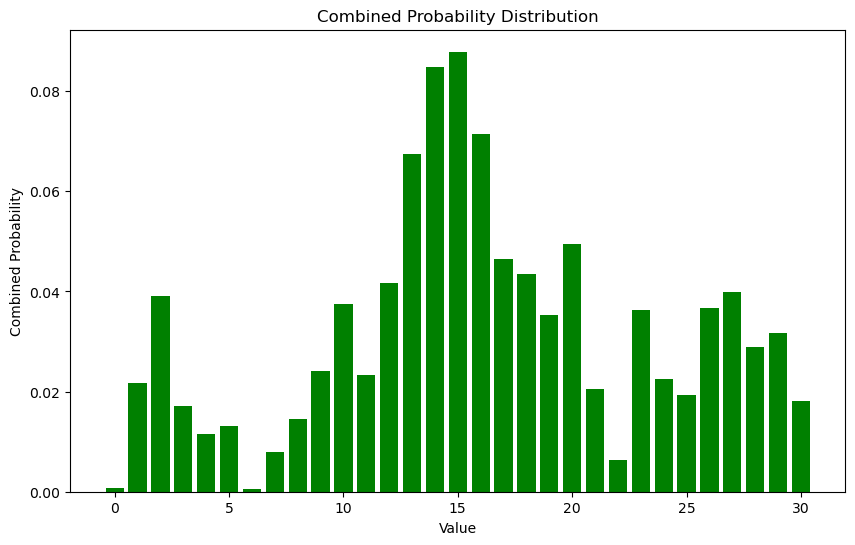

In [13]:
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum()

gaussian_prob = discrete_gaussian_prob(mean_value, 5)

combined_prob = combined_prob / np.sum(combined_prob)
Q_prob = softmax(np.array(Q_table))
combined_prob_2 = [ g * q for g, q in zip(gaussian_prob, Q_prob)]
combined_prob_normal = np.array(combined_prob_2)/np.sum(combined_prob_2)

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.bar(np.arange(0, 31), combined_prob_normal, color='blue')
plt.xlabel('Value')
plt.ylabel('Combined Probability')
plt.title('Combined Probability Distribution')
plt.figure(figsize=(10, 6))
plt.bar(np.arange(0, 31), combined_prob, color='green')
plt.xlabel('Value')
plt.ylabel('Combined Probability')
plt.title('Combined Probability Distribution')
plt.show()

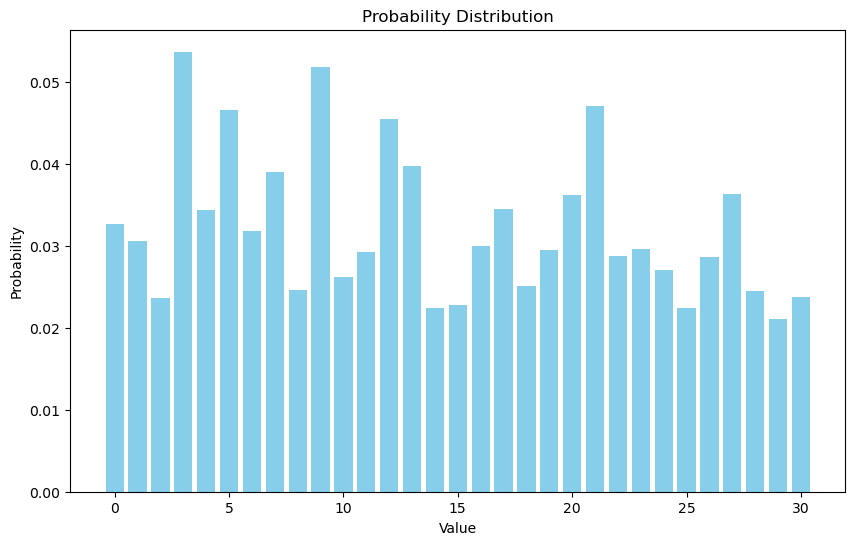

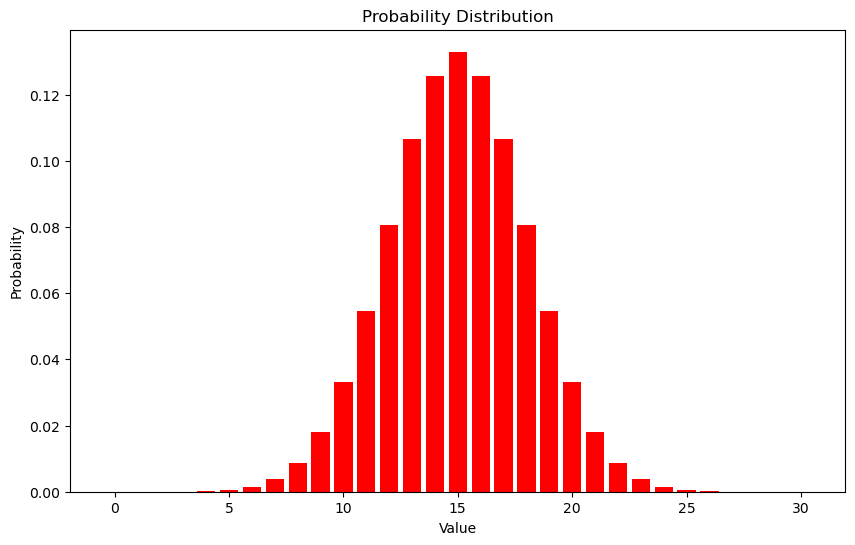

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(np.arange(0, 31), Q_prob, color='skyblue')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability Distribution')
plt.figure(figsize=(10, 6))
plt.bar(np.arange(0, 31), gaussian_prob, color='red')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability Distribution')
plt.show()

In [14]:
# Read Numpy and transfer to csv file.
import numpy as np

fileName = "q_table_unmask__general"
npyName = "models/"+fileName+".npy"
csvName = "results/csv/"+fileName+".csv"

arr = np.load(npyName)

# 배열을 CSV 파일로 저장
np.savetxt(csvName, arr, delimiter=',')

In [33]:
def discrete_gaussian_prob(mean, std, lower_bound=0, upper_bound=30):
    x = np.arange(lower_bound, upper_bound + 1)
    y = (1.0 / np.sqrt(2 * np.pi * std ** 2)) * np.exp(-((x - mean) ** 2) / (2 * std ** 2))
    return y / np.sum(y)

gaussian_prob = discrete_gaussian_prob(mean=0, std=5)
filtered_indices = [i for i, p in enumerate(gaussian_prob) if p > 0.075]
print(filtered_indices)

[0, 1, 2, 3, 4, 5]


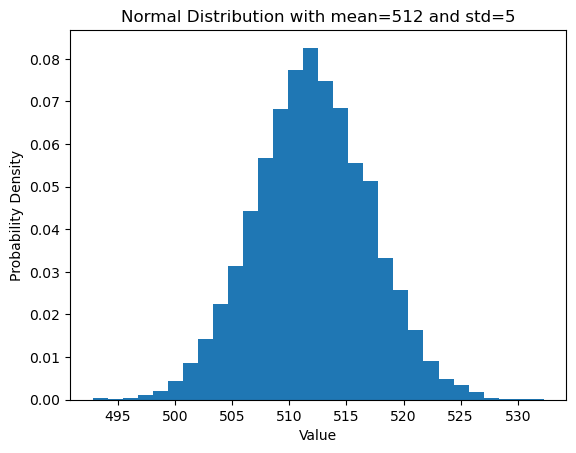

In [5]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def plot_normal_distribution(mean, std, num_samples=10000):
    # 정규 분포 생성
    distribution = torch.distributions.Normal(mean, std)

    # 분포에서 샘플링
    samples = distribution.sample((num_samples,))

    # 샘플들로부터 확률 밀도 함수(PDF) 그리기
    plt.hist(samples.numpy(), bins=30, density=True)
    plt.title(f'Normal Distribution with mean={mean} and std={std}')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.show()

plot_normal_distribution(0.25, 5)


In [14]:
## 영상을 불러와서, 2차원에 시각화
import cv2
import numpy as np
from utils.cal_quality import get_FFT, get_MSE

videoName = "jetson-train"
cap = cv2.VideoCapture("./data/"+videoName+".mp4")
FFTList = np.load("models/FFT_List_"+videoName+".npy")
MSE_data = []
FFT_data = []

idx = 0
ret, prev_frame = cap.read()
while True:
    print(idx)
    idx += 1
    ret, frame = cap.read()
    if not ret:
        cap.release()
    x = get_MSE(prev_frame, frame)
    y = FFTList[idx]
    prev_frame = frame
    MSE_data.append(x)
    FFT_data.append(y)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:650: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'


c:\Users\s_bono0208\AppData\Local\anaconda3\envs\COIN\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\s_bono0208\AppData\Local\anaconda3\envs\COIN\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


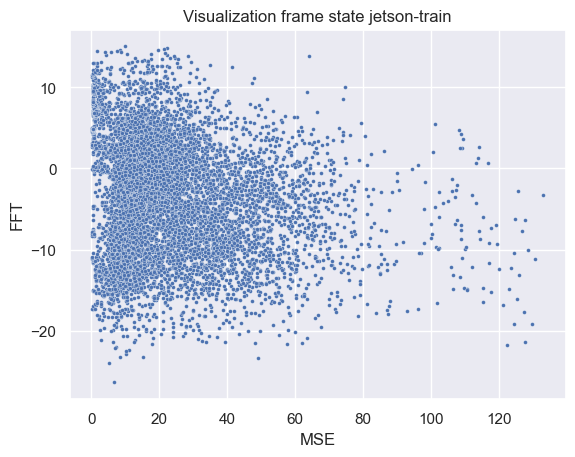

<Figure size 1600x1400 with 0 Axes>

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.scatterplot(x=MSE_data, y=FFT_data, s=8, markers='x')

# 그래프 제목과 레이블 추가
plt.title('Visualization frame state jetson-train')
plt.xlabel('MSE')
plt.ylabel('FFT')

plt.figure(figsize=(16, 14))
plt.show()